In [2]:
import pandas as pd
import numpy as np

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

import random
from itertools import combinations
import matplotlib.pyplot as plt

from test_model import test_model

In [18]:
# Comma-separated values
df = pd.read_csv("loan_sanction_train.csv")
for col in df.columns:
    print(col)
#  Change the loan status to a binary value
df["Loan_Status"] = df.Loan_Status.apply(lambda x: 1 if x == "Y" else 0).astype("int")
df["Dependents"] = df["Dependents"].apply(lambda x: 3 if x == "3+" else x)
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Female" else 0)
df["Married"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)
df["Self_Employed"] = df["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)
df["Education"] = df["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
property_map = {"Urban": 1, "Rural": 2, "Semiurban": 3}
df["Property_Area"] = df["Property_Area"].apply(lambda x: property_map[x])
std_df = df.copy()

# Standardize all but the disease column at the end
for column in [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History",
]:
    std_df[column] = (df[column] - df[column].mean()) / df[column].std()


display(df.head(10))
display(std_df.head(10))

print(len(df))


Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,360.0,0.0,3,0
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,3,0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,0.072931,-0.554036,NaN,0.276411,0.432477,1,1
1,LP001003,0,1,1,1,0,-0.134302,-0.038700,-0.215127,0.276411,0.432477,2,0
2,LP001005,0,1,0,1,1,-0.393427,-0.554036,-0.939534,0.276411,0.432477,1,1
3,LP001006,0,1,0,0,0,-0.461686,0.251774,-0.308599,0.276411,0.432477,1,1
4,LP001008,0,0,0,1,0,0.097649,-0.554036,-0.063236,0.276411,0.432477,1,1
5,LP001011,0,1,2,1,1,0.002217,0.879882,1.408945,0.276411,0.432477,1,1
6,LP001013,0,1,0,0,0,-0.502609,-0.035966,-0.600698,0.276411,0.432477,1,1
7,LP001014,0,1,3,1,0,-0.387534,0.301668,0.135392,0.276411,-2.308163,3,0
8,LP001018,0,1,2,1,0,-0.228753,-0.032549,0.252232,0.276411,0.432477,1,1
9,LP001020,0,1,1,1,0,1.217464,3.194108,2.367031,0.276411,0.432477,3,0


614


In [17]:
# Function to test different models found by brute forcer for final stats, to be ran multiple times

test_model(std_df, ["Loan_Amount_Term"], 2, answer_column="Loan_Status", verbose=True)


precision=[0.70781893], recall=[1.], f-score=[0.82891566], support=[172]
precision=[0.70506912], recall=[0.88953488], f-score=[0.78663239], support=[172]
precision=[0.7125], recall=[0.99418605], f-score=[0.83009709], support=[172]
precision=[0.70781893], recall=[1.], f-score=[0.82891566], support=[172]
precision=[0.7173913], recall=[0.95930233], f-score=[0.82089552], support=[172]
precision=[0.70781893], recall=[1.], f-score=[0.82891566], support=[172]
precision=[0.70781893], recall=[1.], f-score=[0.82891566], support=[172]
precision=[0.66666667], recall=[0.12790698], f-score=[0.21463415], support=[172]
precision=[0.70781893], recall=[1.], f-score=[0.82891566], support=[172]
precision=[0.70781893], recall=[1.], f-score=[0.82891566], support=[172]
  2 | AVG FSCORE:	0.763


0.762575312275728

In [ ]:
# Graph the K values of a given set

k_value_dict = {k : test_model(std_df, ["Credit_History"], k, answer_column="Loan_Status", verbose=True) for k in range(1, 21)
}

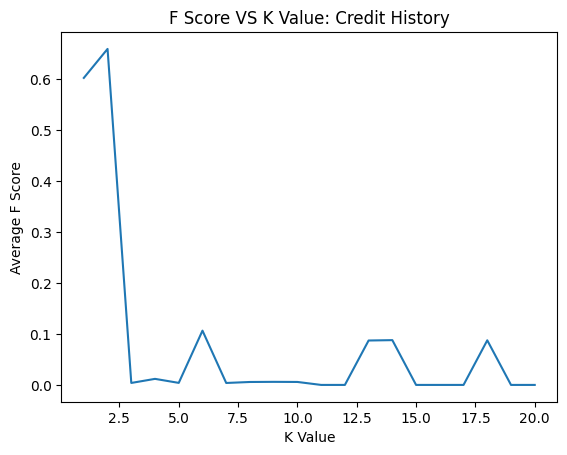

In [25]:
plt.plot(k_value_dict.keys(), k_value_dict.values())
plt.xlabel("K Value")
plt.ylabel("Average F Score")
plt.title("F Score VS K Value: Credit History")
plt.savefig("kvaluedecline.png")